In [1]:
import pandas as pd

## Data Loading

In [2]:
#Load data training, testing, and anime data
train_df = pd.read_csv('Data/train.csv')
anime_df = pd.read_csv('Data/anime.csv')
test_df = pd.read_csv('Data/test.csv')

In [3]:
#Display Training data
train_df.head()

,user_id,anime_id,rating
0,1,11617,10
1,1,11757,10
2,1,15451,10
3,2,11771,10
4,3,20,8


In [4]:
#Display Anime data
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
#Display Test data
test_df.head()

,user_id,anime_id
0,40763,21405
1,68791,10504
2,40487,1281
3,55290,165
4,72323,11111


**Data Cleaning**

In [16]:
# 1. Handling missing values
# Checking for missing values
print("\nMissing values in Anime Data")
print(anime_df.isnull().sum())

print("\nMissing values in Test Data")
print(test_df.isnull().sum())

print("\nMissing values in Train Data")
print(train_df.isnull().sum())


Missing values in Anime Data
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

Missing values in Test Data
user_id     0
anime_id    0
dtype: int64

Missing values in Train Data
user_id     0
anime_id    0
rating      0
dtype: int64


In [17]:
# Filling or dropping missing values
# For simplicity, let's drop rows with any missing values
anime_df_cleaned = anime_df.dropna()
test_df_cleaned = test_df.dropna()
train_df_cleaned = train_df.dropna()

In [18]:
# 2. Checking for duplicates
print("\nDuplicates in Anime Data:", anime_df_cleaned.duplicated().sum())
print("Duplicates in Test Data:", test_df_cleaned.duplicated().sum())
print("Duplicates in Train Data:", train_df_cleaned.duplicated().sum())

# Dropping duplicates if any
anime_df_cleaned = anime_df_cleaned.drop_duplicates()
test_df_cleaned = test_df_cleaned.drop_duplicates()
train_df_cleaned = train_df_cleaned.drop_duplicates()


Duplicates in Anime Data: 0
Duplicates in Test Data: 0
Duplicates in Train Data: 1


In [19]:
# 3. Ensuring consistent data types
print("\nData types in Anime Data")
print(anime_df_cleaned.dtypes)

print("\nData types in Test Data")
print(test_df_cleaned.dtypes)

print("\nData types in Train Data")
print(train_df_cleaned.dtypes)

# Convert data types if necessary
# Assuming 'episodes' in anime_df should be numeric, convert if needed
anime_df_cleaned['episodes'] = pd.to_numeric(anime_df_cleaned['episodes'], errors='coerce')
anime_df_cleaned = anime_df_cleaned.dropna(subset=['episodes'])

# Display the cleaned data
print("\nCleaned Anime Data")
print(anime_df_cleaned.head())

print("\nCleaned Test Data")
print(test_df_cleaned.head())

print("\nCleaned Train Data")
print(train_df_cleaned.head())


Data types in Anime Data
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

Data types in Test Data
user_id     int64
anime_id    int64
dtype: object

Data types in Train Data
user_id     int64
anime_id    int64
rating      int64
dtype: object

Cleaned Anime Data
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type  episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie       1.0    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0    9.25   
3           

## Exploratory Data Analysis

**Data Overview**

*Basic Information*

In [20]:
print("Anime Data Info")
print(anime_df_cleaned.info())
print("\nTest Data Info")
print(test_df_cleaned.info())
print("\nTrain Data Info")
print(train_df_cleaned.info())

Anime Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  object 
 2   genre     11830 non-null  object 
 3   type      11830 non-null  object 
 4   episodes  11830 non-null  float64
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 739.4+ KB
None

Test Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633686 entries, 0 to 633685
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   user_id   633686 non-null  int64
 1   anime_id  633686 non-null  int64
dtypes: int64(2)
memory usage: 9.7 MB
None

Train Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 5703553 entries, 0 to 5703553
Data columns (total 3 columns):
 #   Column    D

*Statistucal Summary*

In [21]:
print("Anime Data Description")
print(anime_df_cleaned.describe())
print("\nTest Data Description")
print(test_df_cleaned.describe())
print("\nTrain Data Description")
print(train_df_cleaned.describe())

Anime Data Description
           anime_id      episodes        rating       members
count  11830.000000  11830.000000  11830.000000  1.183000e+04
mean   13404.150211     12.486729      6.484609  1.851100e+04
std    11110.087616     47.097131      1.019147  5.537144e+04
min        1.000000      1.000000      1.670000  1.200000e+01
25%     3326.250000      1.000000      5.892500  2.322500e+02
50%     9820.500000      2.000000      6.570000  1.589500e+03
75%    23302.500000     12.000000      7.190000  9.832000e+03
max    34519.000000   1818.000000     10.000000  1.013917e+06

Test Data Description
             user_id       anime_id
count  633686.000000  633686.000000
mean    36777.752605    8909.389543
std     21028.330970    8880.430436
min         1.000000       1.000000
25%     18974.000000    1240.000000
50%     36919.000000    6213.000000
75%     54908.000000   14131.000000
max     73516.000000   34367.000000

Train Data Description
            user_id      anime_id        rating


*Checking Data Distributions*

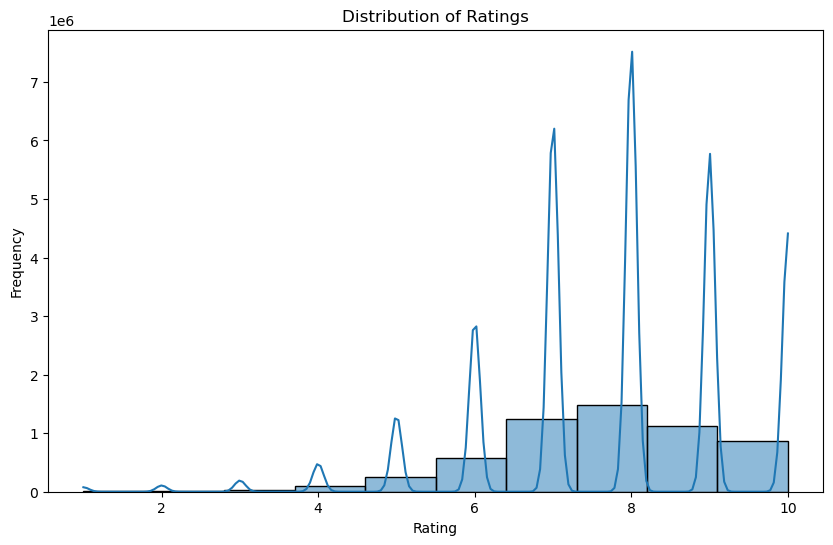

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings in train data
plt.figure(figsize=(10, 6))
sns.histplot(train_df_cleaned['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


*Relationship between Variables*

Correlation Mix

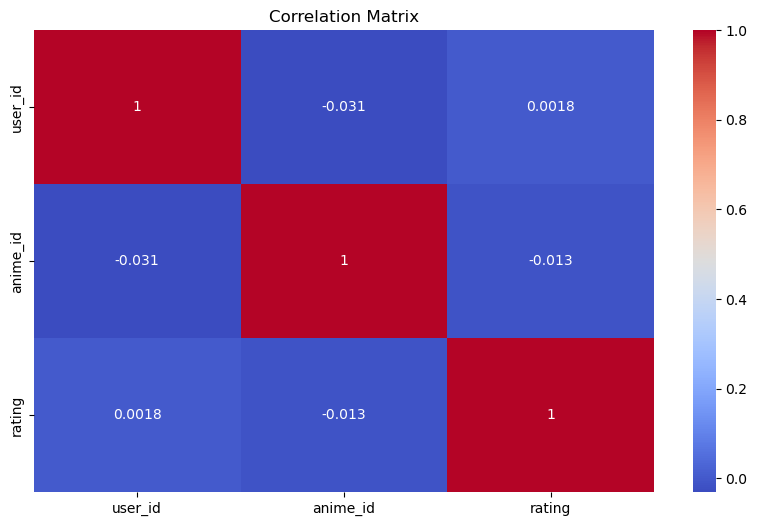

In [23]:
# Correlation matrix for train data
plt.figure(figsize=(10, 6))
sns.heatmap(train_df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Ratings by Anime Type

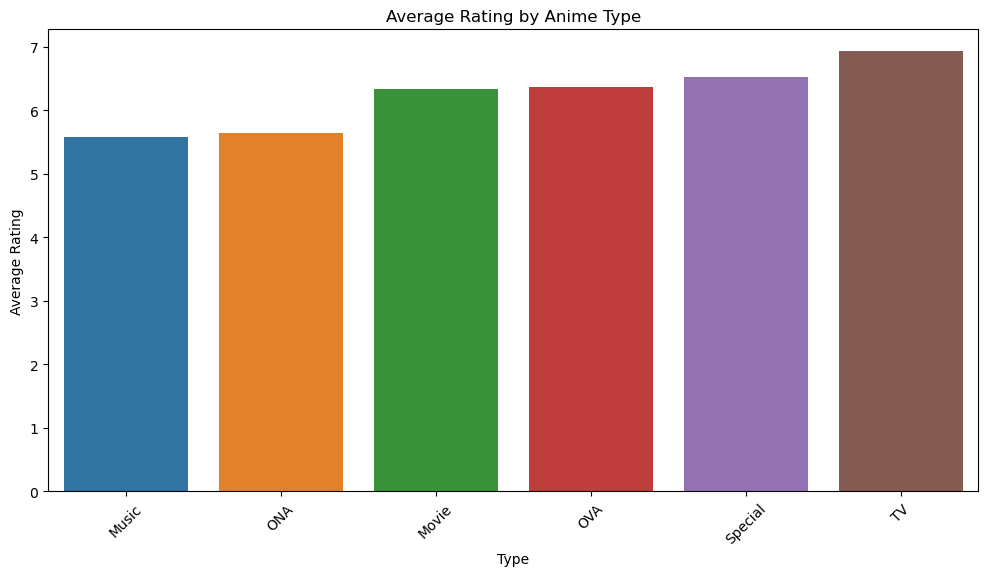

In [24]:
# Mean rating by anime type
type_ratings = anime_df_cleaned.groupby('type')['rating'].mean().sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=type_ratings.index, y=type_ratings.values)
plt.title('Average Rating by Anime Type')
plt.xlabel('Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


*Analysing Popularity*

Top Ten most Rated Animes

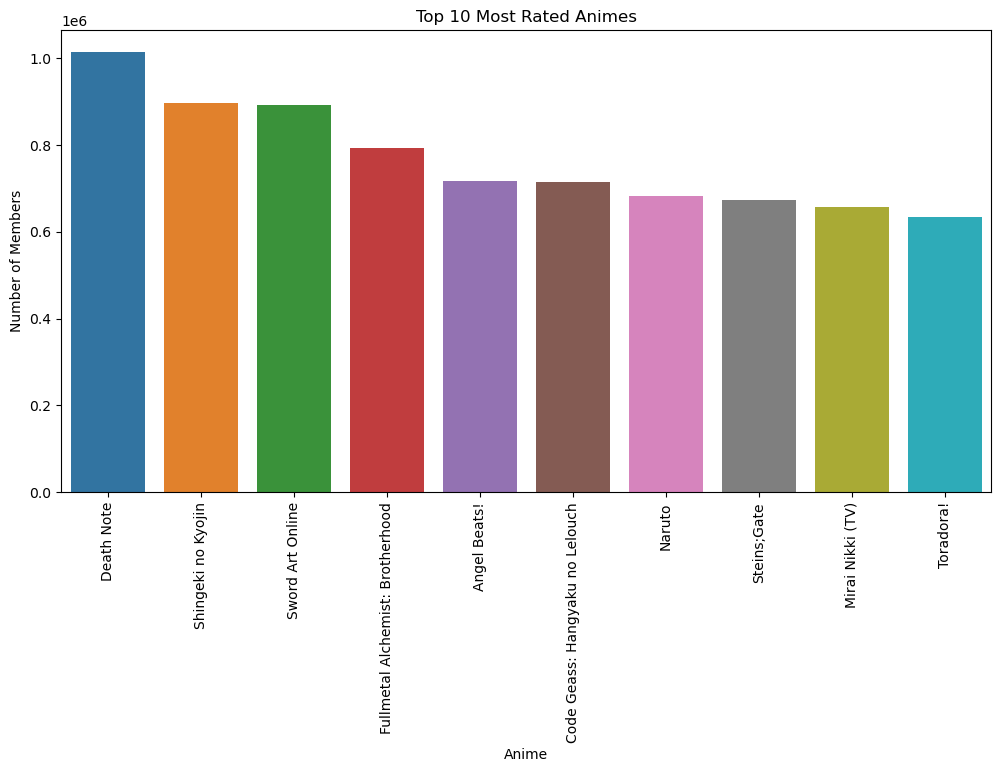

In [25]:
top_animes = anime_df_cleaned.sort_values(by='members', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_animes['name'], y=top_animes['members'])
plt.title('Top 10 Most Rated Animes')
plt.xlabel('Anime')
plt.ylabel('Number of Members')
plt.xticks(rotation=90)
plt.show()


Top Ten Highest Rated Anime

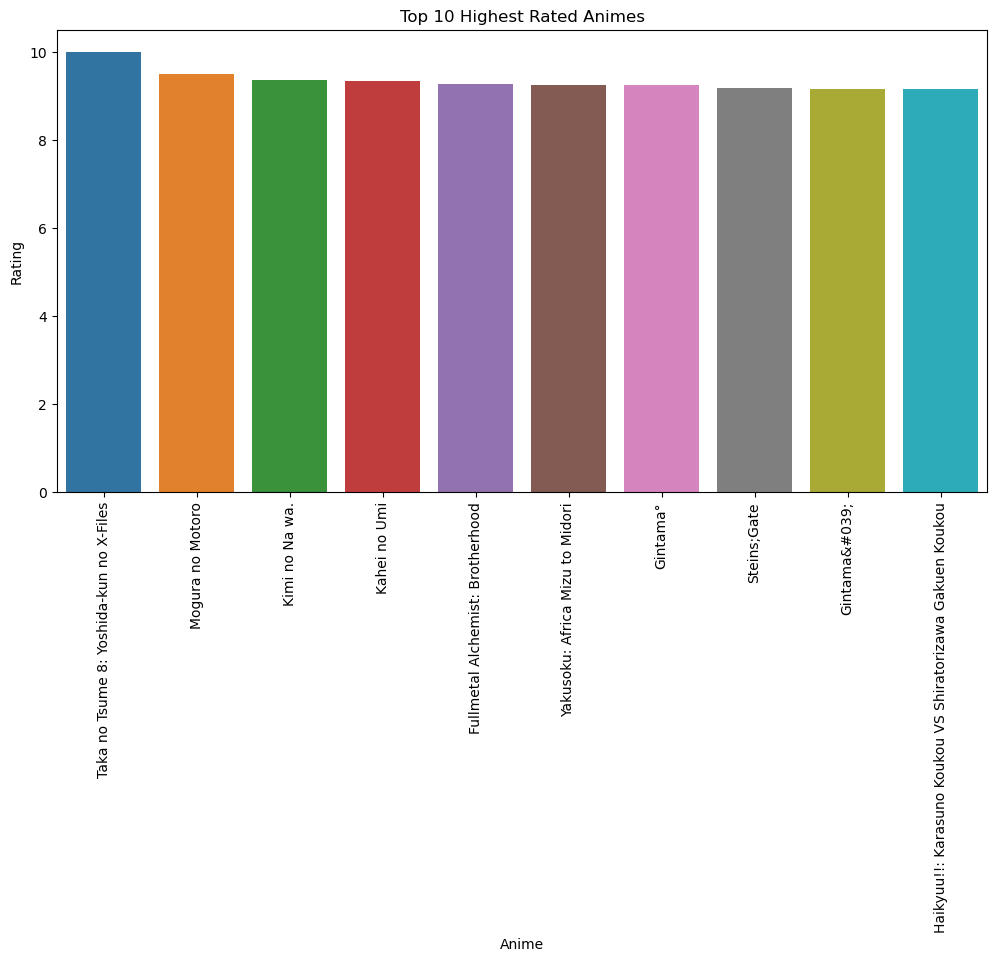

In [26]:
top_rated_animes = anime_df_cleaned.sort_values(by='rating', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_animes['name'], y=top_rated_animes['rating'])
plt.title('Top 10 Highest Rated Animes')
plt.xlabel('Anime')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


*User Analysis*

User Activity

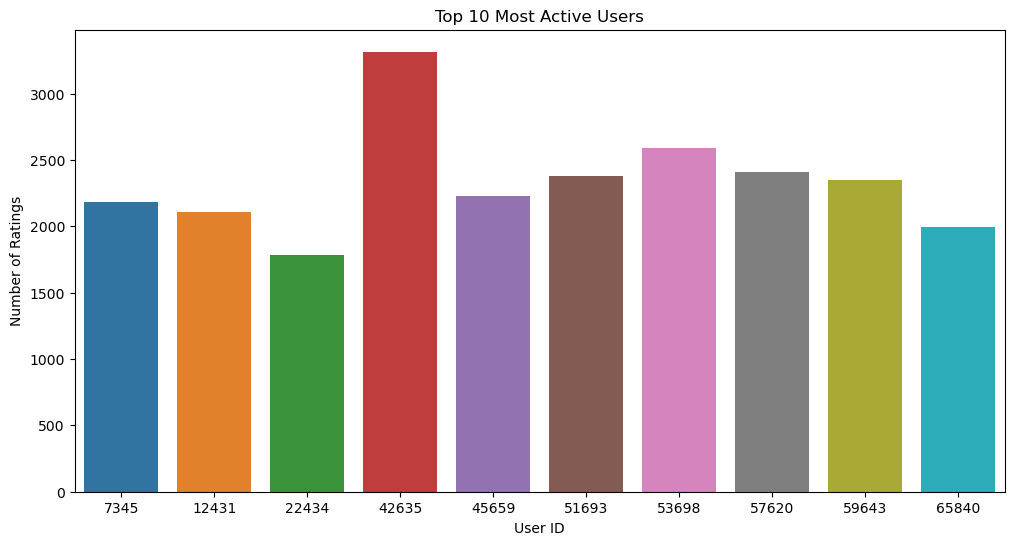

In [27]:
user_activity = train_df_cleaned['user_id'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=user_activity.index, y=user_activity.values)
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings')
plt.show()


*Genre Analysis*

Most Common Genres

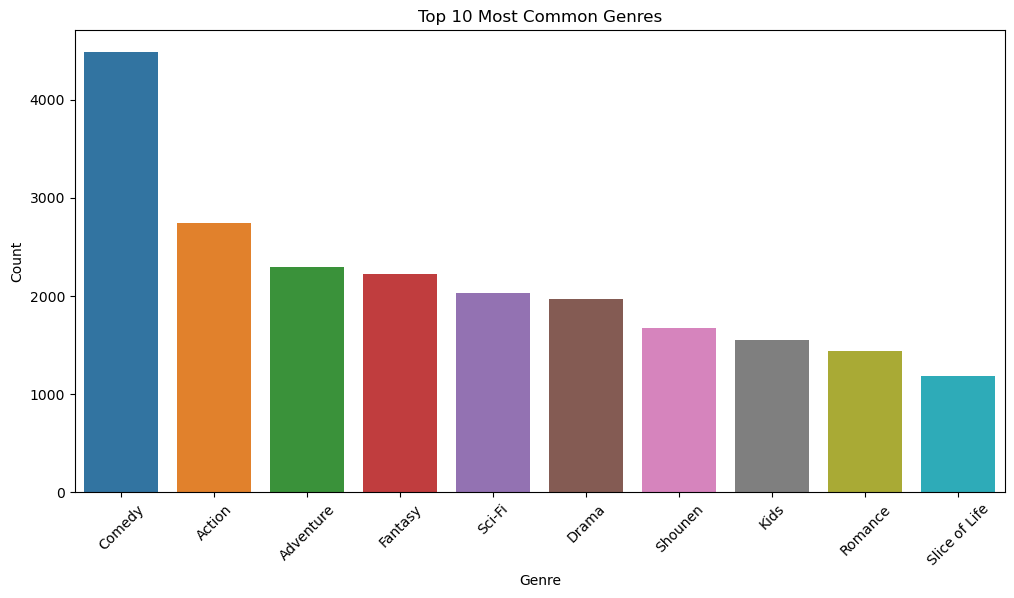

In [28]:
from collections import Counter

genres = anime_df_cleaned['genre'].str.split(', ')
genre_list = [item for sublist in genres.dropna() for item in sublist]
genre_counts = Counter(genre_list)
most_common_genres = genre_counts.most_common(10)

genres, counts = zip(*most_common_genres)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(genres), y=list(counts))
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
